<a href="https://colab.research.google.com/github/machtg/movie-recommendation-bangkit/blob/master/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation

by Hanjaya Suryalim and Maclaurin Hutagalung

Data was taken from https://www.kaggle.com/zeeshanmulla/recommendation-system-movie

## Import Library

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
sns.set()

## Load Data

In [0]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [0]:
df = pd.read_csv('Recommendation System.csv')

In [0]:
df.columns=['user_id','item_id','rating','timestamp']

In [0]:
df.head()

,user_id,item_id,rating,timestamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [0]:
df.tail()

,user_id,item_id,rating,timestamp
99997,880,476,3,880175444
99998,716,204,5,879795543
99999,276,1090,1,874795795
100000,13,225,2,882399156
100001,12,203,3,879959583


In [0]:
df.describe()

,user_id,item_id,rating,timestamp
count,100002.000000,100002.000000,100002.000000,1.000020e+05
mean,462.475500,425.524670,3.529849,8.835288e+08
std,266.619776,330.797313,1.125700,5.343812e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


## Data Quality Assesment

### Outliers

In [0]:
def get_Q3(dataframe,dimension):
    return dataframe[dimension].quantile(0.75)

def get_Q1(dataframe,dimension):
    return dataframe[dimension].quantile(0.25)

def get_batas_atas_bawah(dataframe,dimension):
    q3 = get_Q3(dataframe,dimension)
    q1 = get_Q1(dataframe,dimension)
    iqr = q3-q1
    return q3 + (1.5 * iqr),q1 - (1.5*iqr)

def clean_outlier(dataframe,dimension):
    batas_atas,batas_bawah = get_batas_atas_bawah(dataframe,dimension)
    index_outlier=[]
    for element in dataframe.iterrows():
        if element[1][dimension] < batas_bawah or element[1][dimension] > batas_atas:
            index_outlier.append(element[0])
    data_clean = dataframe.drop(index_outlier)
    data_clean.reindex()
    return data_clean

Rating

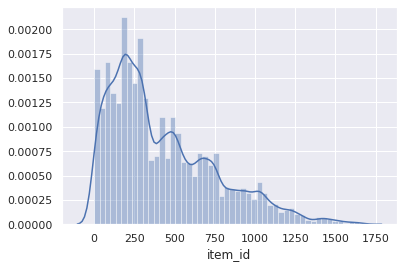

In [0]:
sns.distplot(df['item_id'])